# Time and Accuracy Performance Analysis between Julia and Python for a simple FFNN
### Python Script

To download the CSV format of FASHION MNIST Please visit https://www.kaggle.com/zalando-research/fashionmnist

In [24]:
import pandas as pd
from sklearn.metrics import accuracy_score
data = pd.read_csv('/home/ashvin/Desktop/FASHION MNIST/fashionmnist/fashion-mnist_train.csv')
test_data = pd.read_csv('/home/ashvin/Desktop/FASHION MNIST/fashionmnist/fashion-mnist_test.csv')

In [25]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Displaying a few random samples as images, we see that there are many categories such as shoes, handbags, shirts among others


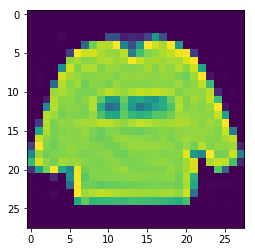

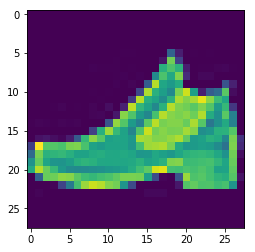

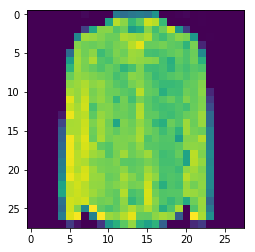

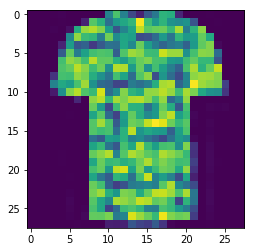

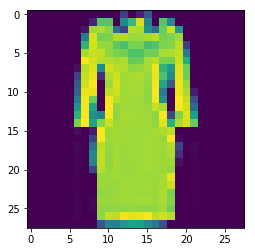

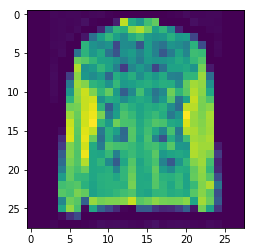

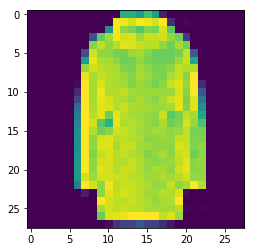

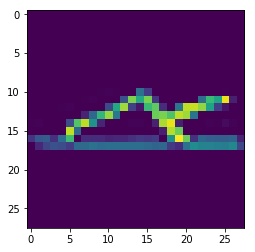

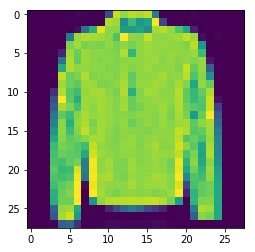

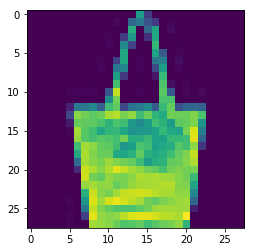

In [26]:
import matplotlib.pyplot as plt
import numpy as np
for i in range(0,10):
    img = np.array(data.iloc[i,1:]).reshape((28, 28))
    plt.figure(i)
    imgplot = plt.imshow(img)

In [27]:
X = data.iloc[:,1:len(data)]
y = data.iloc[:,0]

### Defining a model in python using keras same NN architecture is also defined in Julia notebook "Julia_FFNN"

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import time 
def ffnn(X,y, noofepochs = 100):
    model = Sequential()
    model.add(Dense(100, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    y = to_categorical(y.values)
    start = time.time()
    model.fit(X, y, epochs=noofepochs, batch_size=len(X))
    end = time.time()
    print('time in secs is {} secs'.format(end-start))
    return model

### We see that the model is trained just under 237.6 seconds with an accuracy score of 59.8%

However, this test accuracy is subjected much variance as it depends on the data samples considered. So one way to counter this is to go for K fold cross validation. The objective was to compare the time performances between Python and Julia on FASHION MNIST data

In [29]:
mod = ffnn(X,y)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
60000/60000 [==============================] - 3s 46us/step - loss: 2.5584 - acc: 0.8330
Epoch 2/100
60000/60000 [==============================] - 2s 40us/step - loss: 2.6491 - acc: 0.8276
Epoch 3/100
60000/60000 [==============================] - 2s 40us/step - loss: 2.4648 - acc: 0.8362
Epoch 4/100
60000/60000 [==============================] - 2s 41us/step - loss: 2.3915 - acc: 

Epoch 75/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.8304 - acc: 0.9207
Epoch 76/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.8478 - acc: 0.9204
Epoch 77/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.8530 - acc: 0.9193
Epoch 78/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.8478 - acc: 0.9188
Epoch 79/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.8236 - acc: 0.9184
Epoch 80/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.7989 - acc: 0.9178
Epoch 81/100
60000/60000 [==============================] - 3s 43us/step - loss: 0.8030 - acc: 0.9166
Epoch 82/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.7988 - acc: 0.9189
Epoch 83/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.7991 - acc: 0.9186
Epoch 84/100
60000/60000 [==============================] - 2s 39us/step - loss: 0

In [42]:
test_X = test_data.iloc[:,1:len(test_data)]
test_Y = test_data.iloc[:,0]
yhat = mod.predict_classes(test_X)
acc = accuracy_score(test_Y, yhat)
print("acc is {}".format(acc*100))

acc is 59.8


10000

We can see that from confusion matrix the accuracy is about 56.18 
To calculate acc from matrix perform 'np.trace(cnf_matrix)/sum(sum(cnf_matrix))'

Confusion matrix, without normalization
[[743  28   0   0  18   4 161   8  35   3]
 [  2 966   0   0  10   2  15   2   3   0]
 [ 21 209   0   0 482   7 244   4  29   4]
 [145 293   0   0 222   1 257  27  54   1]
 [  3  67   0   0 804   1 113   5   7   0]
 [  1   2   0   0   2 902  16  10  29  38]
 [157  49   0   0 163  11 576   8  34   2]
 [  0  13   0   0   1 380 347 106  23 130]
 [  8   3   0   0   9   3  18  14 940   5]
 [  0   2   0   0   1  20   6  21   7 943]]


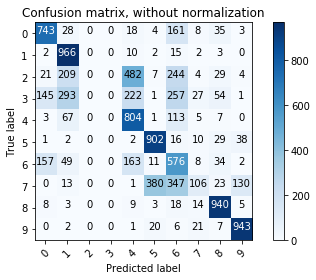

In [35]:
############### Plotting COnfusion Matrix ##############
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(test_Y, yhat)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = [0,1,2,3,4,5,6,7,8,9]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

0.598